<font size="9">Read Data<font size="4">Hongyi Zhang

In [1]:
## Author Hongyi Zhang
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

data=pd.read_csv("C:\\Users\\zhy92\\Desktop\\Stevens Master\\Classes\\2020 Spring\\CPE -695-WS Applied Machine Learning\\HW3\\Problems\\Titanic.csv")

data.head()

## Convert strings into numerical values
data['pclass'],_ = pd.factorize(data['pclass'])
data['sex'],_ = pd.factorize(data['sex'])

## Replace missing values with the mean of the column
data.pclass.fillna(data.pclass.mean(),inplace=True)
data.sex.fillna(data.sex.mean(),inplace=True)
data.age.fillna(data.age.mean(),inplace=True)
data.survived.fillna(data.survived.mean(),inplace=True)
data.sibsp.fillna(data.sibsp.mean(),inplace=True)


data

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,0,1,"Allen, Miss. Elisabeth Walton",0,29.000000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,0,1,"Allison, Master. Hudson Trevor",1,0.916700,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,0,0,"Allison, Miss. Helen Loraine",0,2.000000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,0,0,"Allison, Mr. Hudson Joshua Crei",1,30.000000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,0,0,"Allison, Mrs. Hudson J C (Bessi",0,25.000000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,2,0,"Zabour, Miss. Hileni",0,14.500000,1,0,2665,14.454200,NaN,Cherbourg,NaN,328.0,NaN
1305,1306,2,0,"Zabour, Miss. Thamine",0,29.881135,1,0,2665,14.454200,NaN,Cherbourg,NaN,NaN,NaN
1306,1307,2,0,"Zakarian, Mr. Mapriededer",1,26.500000,0,0,2656,7.225000,NaN,Cherbourg,NaN,304.0,NaN
1307,1308,2,0,"Zakarian, Mr. Ortin",1,27.000000,0,0,2670,7.225000,NaN,Cherbourg,NaN,NaN,NaN


<font size="9"> Fit Tree

In [2]:
## Fit a classification tree
feature_cols = ['pclass', 'sex',  'age',  'sibsp']
X = data[feature_cols] 
y = data.survived 
## Creating Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clft = DecisionTreeClassifier()
clft = clft.fit(X_train,y_train)


<font size="9"> Visualize Tree

In [3]:
import sys
!{sys.executable} -m pip install pydotplus
!{sys.executable} -m pip install graphviz

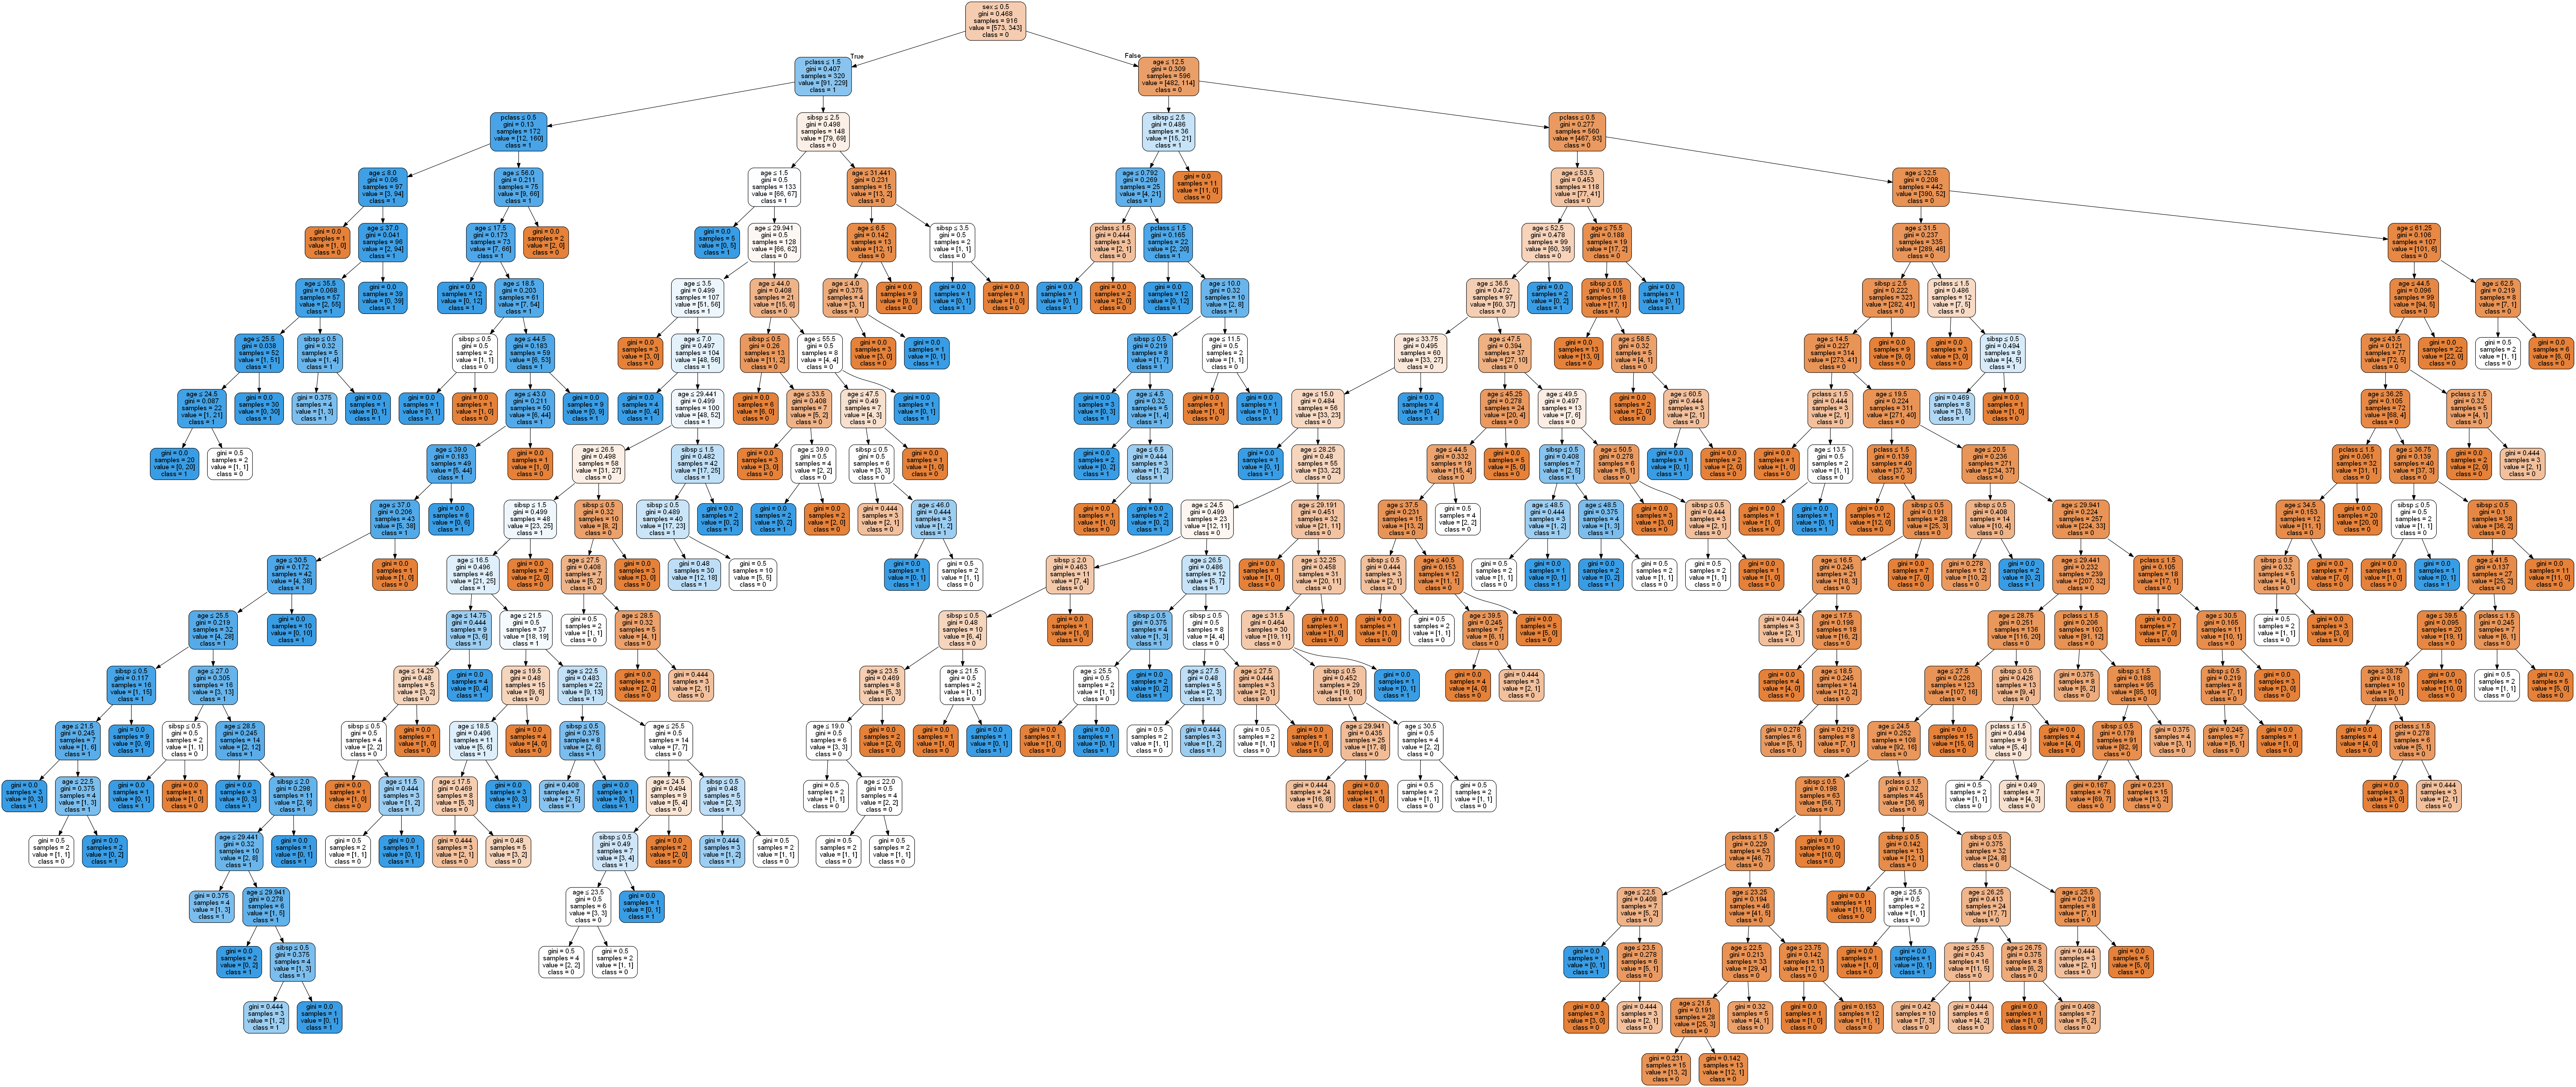

In [12]:
##Visualize Tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\zhy92\Anaconda3\pkgs\Graphviz2.38\bin'


dot_data = StringIO()
export_graphviz(clft, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Titanic.png')
Image(graph.create_png())

In [5]:
##performance measures of the full model
y_pred = clft.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))## Out-of-sample

Accuracy: 0.7760814249363868


In [6]:
y_pred2 = clft.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred2))##In-sample

Accuracy: 0.8864628820960698


<font size="9"> Pruning Tree

In [7]:
## Using CV to find the best Parameter.
from sklearn.model_selection import GridSearchCV
parameters = {'max_leaf_nodes': [None,2,3,4,5,6,7,8,9]}
grid_search = GridSearchCV(estimator = clft,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
print("\nThe best parameter is {}".format(grid_search.best_params_))


The best parameter is {'max_leaf_nodes': 6}


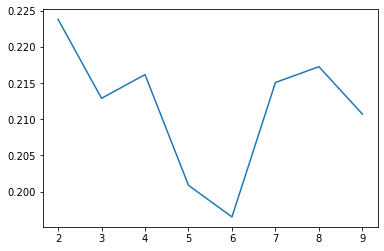

In [11]:
## Plot tree sizes VS misclassification rate.
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
misclassification=[]
for i in range (2,10):
    parameters = {'max_leaf_nodes': [i]}
    grid_search = GridSearchCV(estimator = clft,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
    grid_search = grid_search.fit(X_train, y_train)
    misclassification.append(1-grid_search.best_score_)
    
#print(misclassification)
x=[2,3,4,5,6,7,8,9]
plt.plot(x,misclassification)

<font size="5"> When doing CV, the max_leaf_nodes I find is 6, which has the least misclassification rate.

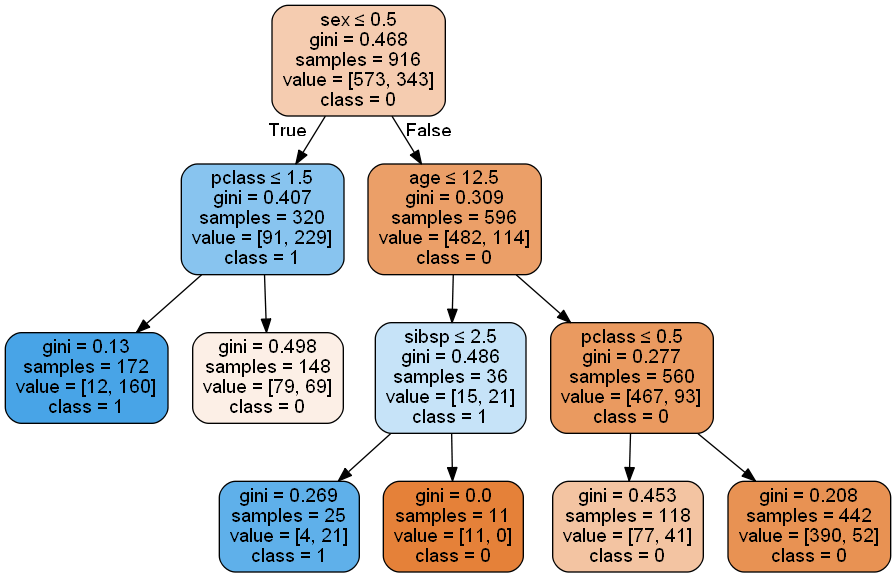

In [9]:
## Tree after pruning
clft1 = DecisionTreeClassifier(max_leaf_nodes= 6)
clft1 = clft1.fit(X_train,y_train)

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\zhy92\Anaconda3\pkgs\Graphviz2.38\bin'


dot_data = StringIO()
export_graphviz(clft1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Titanic.png')
Image(graph.create_png())

In [10]:
##performance measures of the full model
y_pred = clft1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))## Out-of-sample
y_pred3 = clft1.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred3))##In-sample

Accuracy: 0.7837150127226463
Accuracy: 0.8056768558951966


<font size="5"> The Accuracy of test sets increases, and the accuracy of both training data and test data get close to each other.